# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Is the distribution of body temperatures normal?

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Is the distribution of body temperatures normal?

In [2]:

df_n_d = df.temperature.value_counts(dropna=False)
df.head()
df_n_d =df_n_d.to_frame()
df_n_d['temp'] = df_n_d.index
df_n_d.reset_index()
df_n_d.head()


,temperature,temp
98.0,11,98.0
98.2,10,98.2
98.8,10,98.8
98.6,10,98.6
98.4,9,98.4


In [3]:
import matplotlib.pyplot as plt 
_ = plt.plot( df_n_d.index, df_n_d['temperature'], marker='.', linestyle='none')

_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')
plt.show()


<Figure size 640x480 with 1 Axes>

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


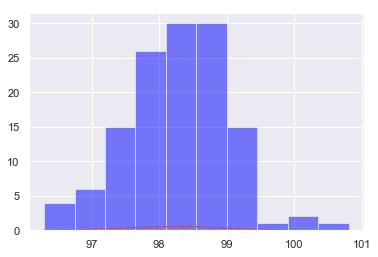

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

# Set default Seaborn style

sns.set()
# Plot histogram of versicolor petal lengths
n, bins, patches = plt.hist(df['temperature'], 10, facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins,  mu, sigma)
plt.plot(bins, y, 'r--')
# Show histogram

plt.show()


In [5]:
import statistics as stat
print(mu,np.median(df['temperature']) )

from collections import Counter
data = Counter(df['temperature'])
data.most_common()   # Returns all unique items and their counts
data.most_common(1) 

98.24923076923078 98.3


[(98.0, 11)]

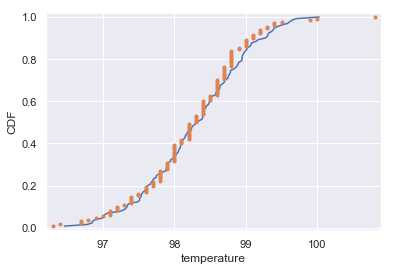

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len( data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



inter_df = np.random.normal(mu, sigma, 130)
x, y = ecdf(df['temperature'])

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_df)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('temperature')
plt.ylabel('CDF')

# Show the plot
plt.show()

In [7]:
from scipy import stats
x = df['temperature']
stats.kstest(x, 'norm')


KstestResult(statistic=1.0, pvalue=0.0)

Yes, distribution is normal.

# Is the sample size large? Are the observations independent?

In [49]:
print( 'Sample size contains %d observations, it is normal, observations are independant' % len(df))

Sample size contains 130 observations, it is normal, observations are independant


# Is the true population mean really 98.6 degrees F?

In [9]:
print(np.mean(df['temperature']) )
df['temperature'].isna().sum() 
#df['temperature']


98.24923076923078


0

In [10]:
population_mean = 98.6 
sample_shifted = df['temperature']  - np.mean(df['temperature']) + population_mean

def diff_from_pop(data, population_mean = 98.6 ):
    return np.mean(data) - population_mean

diff_obs = diff_from_pop(df['temperature']) 
diff_obs

-0.35076923076921673

In [11]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates from a data set."""
    n = len(data)
    
    # Initialize array of replicates
    reps = np.empty(size)
    
    for i in range(size):
        # Generate bootstrap sample
        bs_sample = np.random.choice(data, n)
        
        # Compute replicate
        reps[i] = func(bs_sample)
        
    return reps

In [12]:

# Make an array of translated impact forces: translated_force_b
translated_force_b = df['temperature'] - np.mean(df['temperature']) + 98.6

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 40)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 40

# Print the p-value
print('p = ', p)


p =  0.0


In [51]:
import scipy.stats as stats
import math
import random
z_critical = stats.norm.ppf(q = 0.975)
sample_mean = np.mean(df['temperature'])

pop_stdev = df['temperature'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(len(df['temperature'])))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  


In [52]:
confidence_interval

(98.12319642818166, 98.3752651102799)

98.6 is outside of confidence_interval (98.12319642818166, 98.3752651102799), 98.6 is not population mean

# Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [16]:

sample_size = 10
sample = np.random.choice(a= df['temperature'], size = sample_size)


#95%
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(97.53285755839354, 98.36714244160646)


In [17]:
# z asumes we know std of pop, t gives better estimate, narrow confidence is always better, precise range

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['temperature'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(97.49557672087809, 98.40442327912191)


t test is teh correct one to use

# At what temperature should we consider someone's temperature to be "abnormal"?

In [18]:
# based on t distribution 99% conf interval 

In [38]:
st.norm.ppf(.95)

1.6448536269514722

In [39]:
st.norm.ppf(.05)

-1.6448536269514729

In [45]:
import scipy.stats as stats
import math
import random
z_critical = stats.norm.ppf(q = 0.975)
sample_mean = np.mean(df['temperature'])

pop_stdev = df['temperature'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(len(df['temperature'])))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

confidence_interval

(98.12319642818166, 98.3752651102799)

Any temperature taht is outside of the interval (98.12, 98.38) is abnormal

# Is there a significant difference between males and females in normal temperature?

$H_{0}$ : $\mu_{F}$ - $\mu_{M}$ = 0

$H_{A}$ : $\mu_{F}$ - $\mu_{M}$ $\neq$ 0 


With an assumption that $H_{0}$ is correct what is the probability of getting 0.2892 as difference between $\mu_{F}$ and $\mu_{M}$ with $\alpha$ =0.05


In [23]:
df_F = df[df['gender'] == 'F']
df_M = df[df['gender'] == 'M']
#z test 


In [24]:
mean_M = np.mean(df_M['temperature'])
mean_F = np.mean(df_F['temperature'])
std_M = np.std(df_M['temperature'])
std_F = np.std(df_F['temperature'])
n_F = len(df_F['temperature'])
n_M = len(df_M['temperature'])

print ('mean difference :',  mean_F - mean_M)
print ('mean_F :',  mean_F )
print ('mean_M :',  mean_M)
print ('std_F :',  std_F )
print ('std_M :',  std_M)
print ('sample size F :',  len(df_F['temperature']))
print ('sample size M :',  len(df_M['temperature']))


mean difference : 0.289230769230727
mean_F : 98.39384615384613
mean_M : 98.1046153846154
std_F : 0.7377464486428966
std_M : 0.6933598841828696
sample size F : 65
sample size M : 65


sigma : 

\begin{equation*}
\sigma_{\bar{x}_{F} - \bar{x}_{M}} = {\sqrt{ \frac{{S}_{F}^2}{{n}_{F}}+ \frac{{S}_{M}^2}{{n}_{M}}}} \end{equation*}

In [40]:
import math
sigma = math.sqrt(std_F**2/n_F-std_M**2/n_M)

In [41]:
from scipy import stats

st.norm.cdf(1.64)
st.norm.ppf(.95)

1.6448536269514722

In [42]:
sigma*st.norm.ppf(.95)

0.05142002649771265

In [46]:
confidence_interval = (mean_F - mean_M - sigma*st.norm.ppf(.95),
                       mean_F - mean_M + sigma*st.norm.ppf(.95))  

confidence_interval

(0.23781074273301434, 0.34065079572843965)

mean difference is inside of confidence interval of (0.24, 0.34), there is a significant difference between males and females in normal temperature?¶